# PyTorch DL Workflow Fundementals :)

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


print("Torch version: \n", torch.__version__)

Torch version: 
 2.5.1+cu118


## Data

### Getting data Ready

Data is anything, right?
* Excel spreadsheet
* Images
* Videos
* Audio
* Text
* DNA
* other stuff

ML is:
1. Data into numerical rep/encoding
2. Build a model to learn the patterns of that numerical rep/patterns/features/weights




#### Into to Linear Regression

We will use Linear Regression to create a straight line with *known* **parameters**
Formula

Y = a + (b*X)
Where:
- Y: Dependent var
- X: Explanatory var
- b: slope of the line
- a: Intercept : y when X=0

In [2]:
# Known params

b = weight = 0.7 # -> b
a = bias = 0.3 # -> a
#you can chage these values as much as you want

In [3]:
# Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = a + (b*X) #same as in the formula from above

In [4]:
X[:10], y[:10]
# THis is the generated data, and now we need the model to figure out the relationship between the X and the Y,
#we know cuz we made the data and the Formula, but the model won't know them

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Generalization: The ability of an ML Model to perform well on data it hasn't seen before

### Splitting Data

- Training Set 60-80% of the dataset - **always create**
- Testing Set **often create**
- Validation Set 10-20% **always create**

In [5]:
train_split_value = int(0.8 * len(X)) # -> 40
print("train_split: \n", train_split_value, "\n")

# you may just put 40 here
X_train = X[:train_split_value]
y_train = y[:train_split_value]

# and here we are putting the remaining of 80 split into 2, which is 20/2
X_test = X[train_split_value:]
y_test = y[train_split_value:]

print("=================================")
print("X_train set length: \n", len(X_train),"\n")
print("X_train set length: \n", len(X_test),"\n")
print("y_train set length: \n", len(y_train),"\n")
print("y_train set length: \n", len(y_test),"\n")

train_split: 
 40 

X_train set length: 
 40 

X_train set length: 
 10 

y_train set length: 
 40 

y_train set length: 
 10 



#### What is a good way to represent this data?

In [6]:
def plot_predictions( 
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
    """Plots training data in blue, test data and compares predictions"""
    plt.figure(figsize=(10,6))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    
    if predictions is not None:
        # Plot predictions in red
        plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show legend
    plt.legend(prop={"size":14})

Lets run the function now

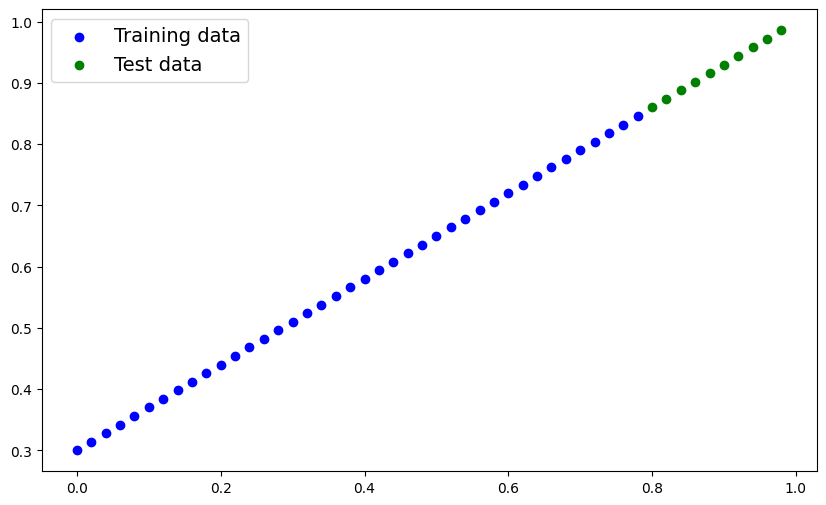

In [7]:
plot_predictions() #since the inputs are hardcoded, we won't need pass them

We will try to make  model to predict red dots over the green dots

all of this is synthetic and simulative data, with a plot

## Building a Model

This will be a Lin Reg Model, it needs a parameters of `a` and `b`, before going into this section, get familiar with OOP in Python

Model behaviour:
* Start with random values
* Look at training data and adjust the `random values` to better represent the ideal values

How does it adjust?
2 Algo:
1. Gradient Descent: This is for getting the least distance and most effecient one
2. BackPropogation: This is to adjust the weights of our NN nodes to improve it, getting the avg of sum of all needs

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        #making random numbers
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        # calculate and adjust the randomness using a Gradient Dessent Algo
        # هذا هو الدالة اللي تشتغل على الموضوع، دالة فورورد
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

##### Lets make an instance and run it

In [9]:
# Create a Random Seed
torch.manual_seed(42)

# Model instance of the Linear Reg Model
model_0 = LinearRegressionModel()

# Check params
print(f"list:\n {list(model_0.parameters())}")
print("==========================================")
print(f"Parameters:\n{model_0.state_dict()}")

list:
 [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
Parameters:
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


#### Check model prection power

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
print(f"Y Predictions: \n {y_preds}")
print("=====================================")
print(f"Y Test: \n{y_test}")

Y Predictions: 
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
Y Test: 
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


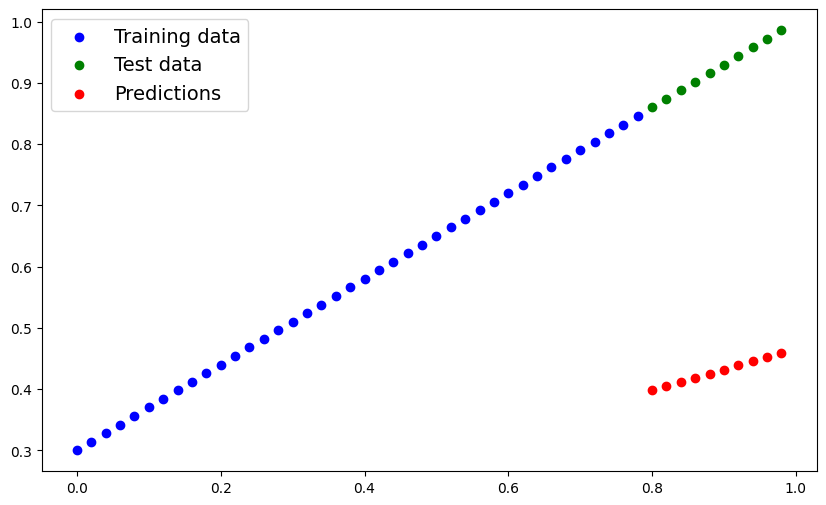

In [11]:
plot_predictions(predictions = y_preds)

#### Lets try plotting these different Ys

The red dots are far from the green dots, that is becs of the random seed we made

## Training a Model

- **Loss Function** : Measure how wrong your model's predictions are to the ideal outputs, lower loss is better :)

- **Optimizer**: Takes the loss and adjusts the models params to improve the loss function

### Setup Loss Function

In [12]:
loss_fn = nn.L1Loss()

### Setup an Optimmizer

In [13]:
optim = torch.optim.SGD(params = model_0.parameters(),
                        lr = 0.01) #learning rate = most important hyper parameter possibility

#### Training Loop

Algorithim:
0. Loop through the data
1. forward pass to make the predictions
2. calculate the loss
3. Optimizer zero grad
4. Loss Backward - back propogation -
5. Optimizer step - gradient descent -

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [31]:
torch.manual_seed(42)

# One loop over the data
epochs = 100

#0. Loop
for epoch in range(epochs):
    # Set model to training mode
    model_0.train()
    
    #1. Forward pass
    y_preds = model_0(X_train)
    print(f"Y predictions is: {y_preds}")
    #2.Calc Loss
    loss = loss_fn(y_preds, y_train)
    print(f"Loss is: {loss}")
    #3. Optimizer 0 grad
    optim.zero_grad()
    
    #4. Backprob on params
    loss.backward()
    
    #5. Do gradient descent
    optim.step()
    
    model_0.eval() #turns off gradient tracking
    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Y predictions is: tensor([[0.2993],
        [0.3132],
        [0.3271],
        [0.3410],
        [0.3549],
        [0.3688],
        [0.3827],
        [0.3966],
        [0.4105],
        [0.4244],
        [0.4383],
        [0.4522],
        [0.4661],
        [0.4800],
        [0.4939],
        [0.5078],
        [0.5218],
        [0.5357],
        [0.5496],
        [0.5635],
        [0.5774],
        [0.5913],
        [0.6052],
        [0.6191],
        [0.6330],
        [0.6469],
        [0.6608],
        [0.6747],
        [0.6886],
        [0.7025],
        [0.7164],
        [0.7303],
        [0.7442],
        [0.7581],
        [0.7720],
        [0.7859],
        [0.7998],
        [0.8137],
        [0.8276],
        [0.8415]], grad_fn=<AddBackward0>)
Loss is: 0.0025885067880153656
Epoch: 0 | Loss: 0.0025885067880153656 | Test Loss: 0.008447891101241112
Y predictions is: tensor([[0.3093],
        [0.3233],
        [0.3373],
        [0.3513],
        [0.3652],
        [0.3792],
       

Now we check the params after every epoch

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

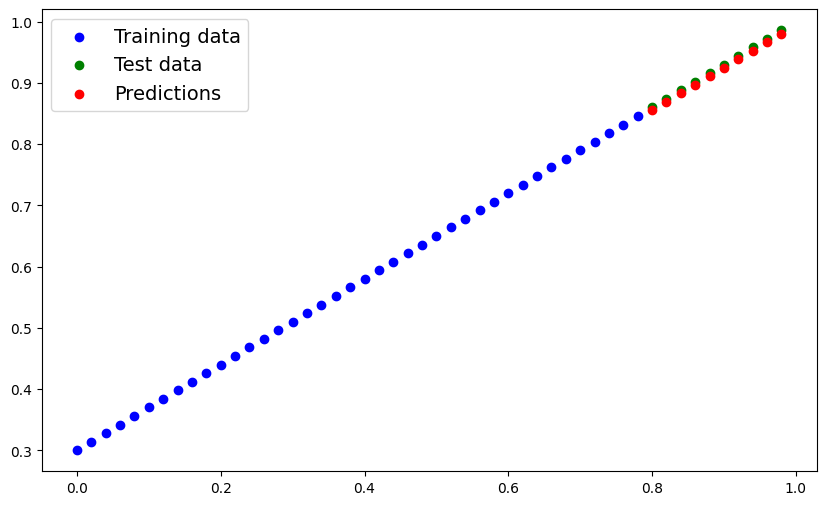

In [32]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
plot_predictions(predictions = y_preds)

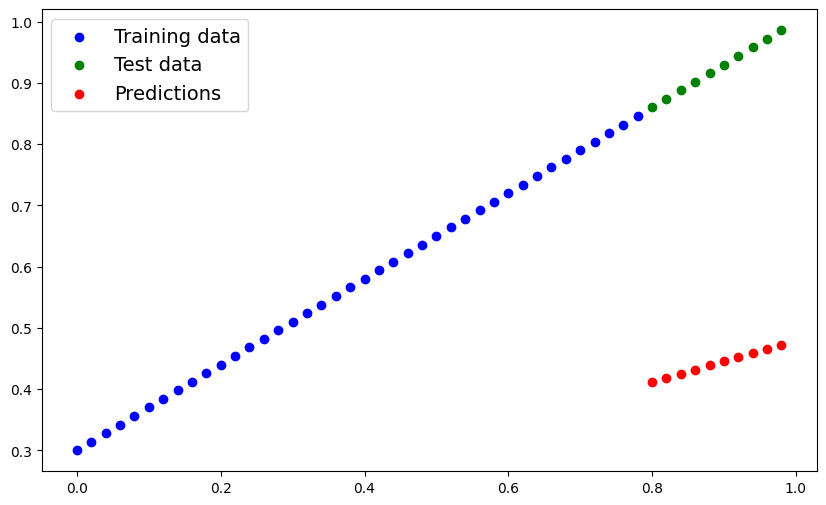

In [18]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
plot_predictions(predictions = y_preds)

#### Testing Loop

## Saving a Model